### Aluno: João Levi Gomes de Lima
### Matrícula: 19211194

In [505]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### 1. Carregue a imagem 'vegetables.png' e segmente o background, obtendo uma imagem semelhante à 'vegetables_result.png'.

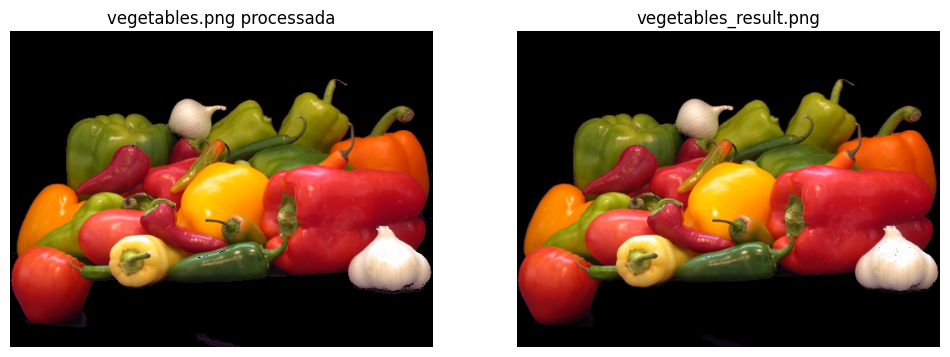

In [506]:
img = cv2.imread('img/vegetables.png')
lab = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def remove_background(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_purple = np.array([80, 40, 40])
    upper_purple = np.array([171, 200, 200])

    mask = cv2.inRange(hsv, lower_purple, upper_purple)
    mask_inverse = cv2.bitwise_not(mask)

    black_bg = np.zeros_like(image)
    black_bg[mask_inverse != 0] = image[mask_inverse != 0]
    return cv2.cvtColor(black_bg, cv2.COLOR_BGR2RGB)


res = remove_background(img)
vegetables_img_result = cv2.imread('img/vegetables_result.png')
vegetables_img_result = cv2.cvtColor(vegetables_img_result, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(res)
axes[0].set_title('vegetables.png processada')
axes[0].axis('off')

axes[1].imshow(res)
axes[1].imshow(vegetables_img_result, alpha=0.5)
axes[1].set_title('vegetables_result.png')
axes[1].axis('off')

plt.show()


#### 2. Carregue a imagem "andromeda.png" e retire os maiores elementos, obtendo um resultado como o ilustrado em "andromeda_result.png".

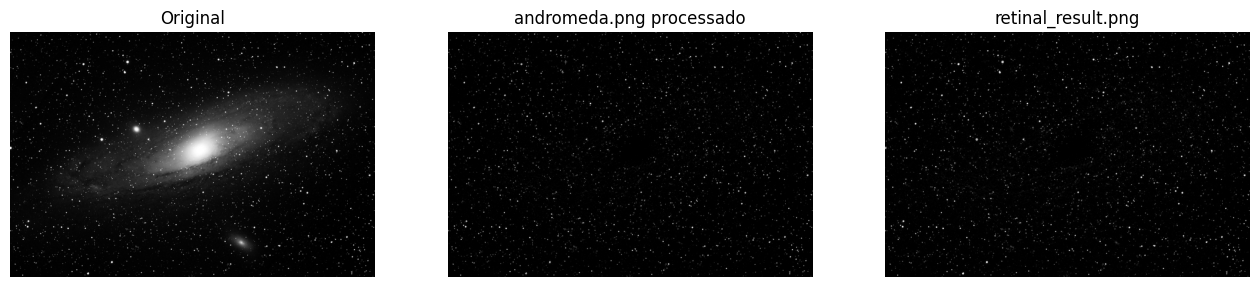

In [507]:
galaxy_image = cv2.imread("img/andromeda.png", cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(galaxy_image, cv2.MORPH_OPEN, kernel)

result_img = cv2.absdiff(galaxy_image, opening)

andromeda_result_img = cv2.imread("img/andromeda_result.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16, 10))

plt.subplot(1, 3, 1)
plt.imshow(galaxy_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(result_img, cmap='gray')
plt.title('andromeda.png processado')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(andromeda_result_img, cmap='gray')
plt.title('retinal_result.png')
plt.axis('off')

plt.show()


#### 3. Carregue a imagem "retinal.png" e use morfologia para realçar as veias, assim como exemplificado em "retinal_result.png".

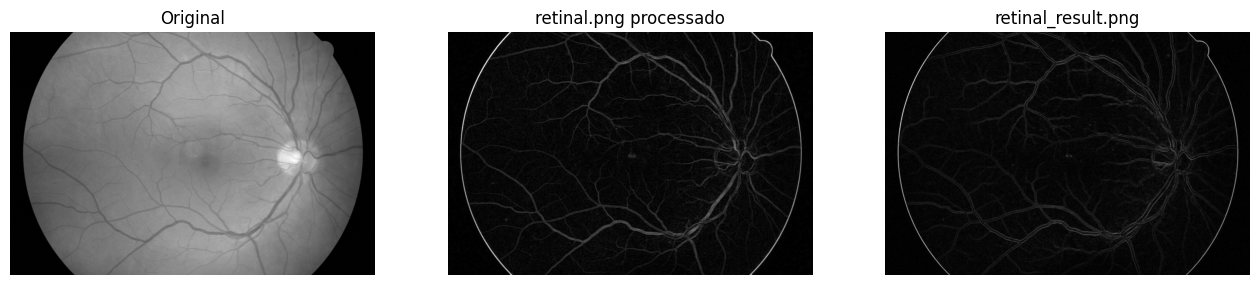

In [508]:
retinal_img = cv2.imread("img/retinal.png", cv2.IMREAD_GRAYSCALE)

kernel_dilate = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(retinal_img, kernel_dilate, iterations=2)

kernel_erode = np.ones((3, 3), np.uint8)
eroded_image = cv2.erode(dilated_image, kernel_erode, iterations=2)

diff_image = cv2.absdiff(retinal_img, eroded_image)

retinal_result_img = cv2.imread("img/retinal_result.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16, 10))

plt.subplot(1, 3, 1)
plt.imshow(retinal_img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(diff_image, cmap='gray')
plt.title('retinal.png processado')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(retinal_result_img, cmap='gray')
plt.title('retinal_result.png')
plt.axis('off')

plt.show()


#### 4. Segmentar o texto da imagem "text.tif" de forma adequada, resultando numa imagem similar à "text_result.png".

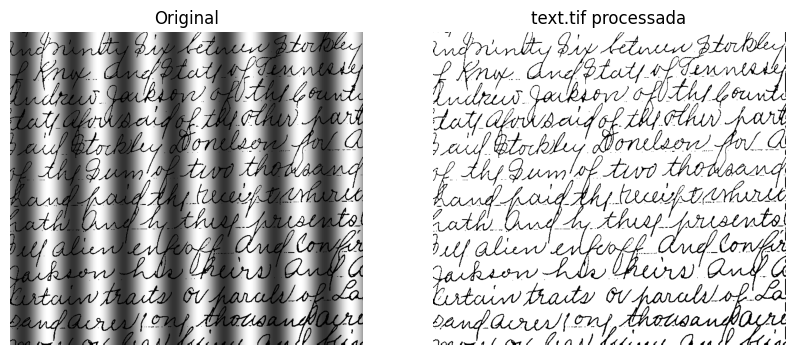

In [509]:
image = cv2.imread("img/text.tif", cv2.IMREAD_GRAYSCALE)

filtered_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('text.tif processada')
plt.axis('off')

plt.show()


#### 5. Segmentar os discos da imagem "diskslight.png" resultando numa imagem similar à "diskslight_result.png".

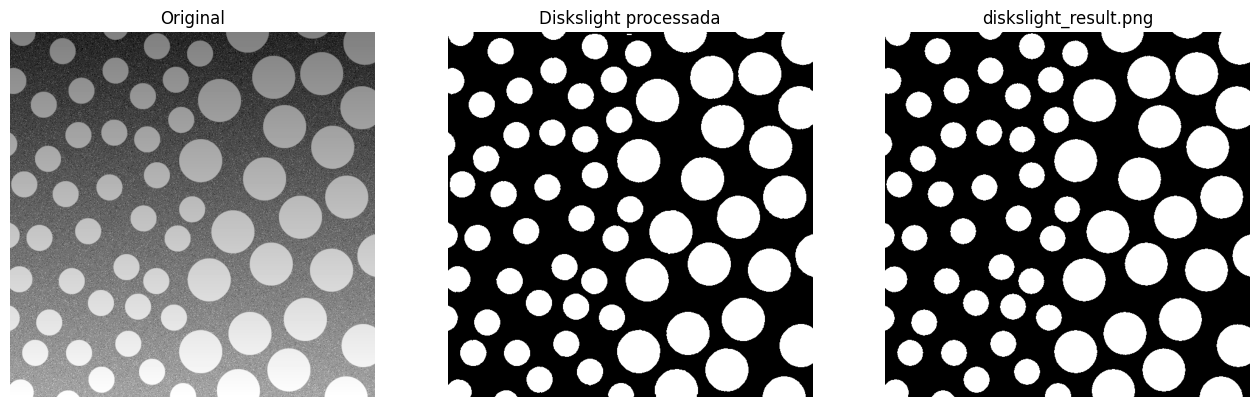

In [510]:
disks_img = cv2.imread("img/diskslight.png", cv2.IMREAD_GRAYSCALE)

kernel_dilate = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(disks_img, kernel_dilate, iterations=2)

kernel_erode = np.ones((3, 3), np.uint8)
eroded_image = cv2.erode(dilated_image, kernel_erode, iterations=4)

diff_image = cv2.absdiff(disks_img, eroded_image)

_, thresholded_image = cv2.threshold(diff_image, 0, 255, cv2.THRESH_BINARY)
thresholded_image = cv2.bitwise_not(thresholded_image)

median_blur = cv2.medianBlur(thresholded_image, 3)

disks_result_img = cv2.imread("img/diskslight_result.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16, 10))

plt.subplot(1, 3, 1)
plt.imshow(disks_img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_blur, cmap='gray')
plt.title('Diskslight processada')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(disks_result_img, cmap='gray')
plt.title('diskslight_result.png')
plt.axis('off')

plt.show()

#### 6. Segmente também os discos maiores e os discos menores, como ilustrado nas imagens "disklights_result2.png" e "disklights_result3.png". 

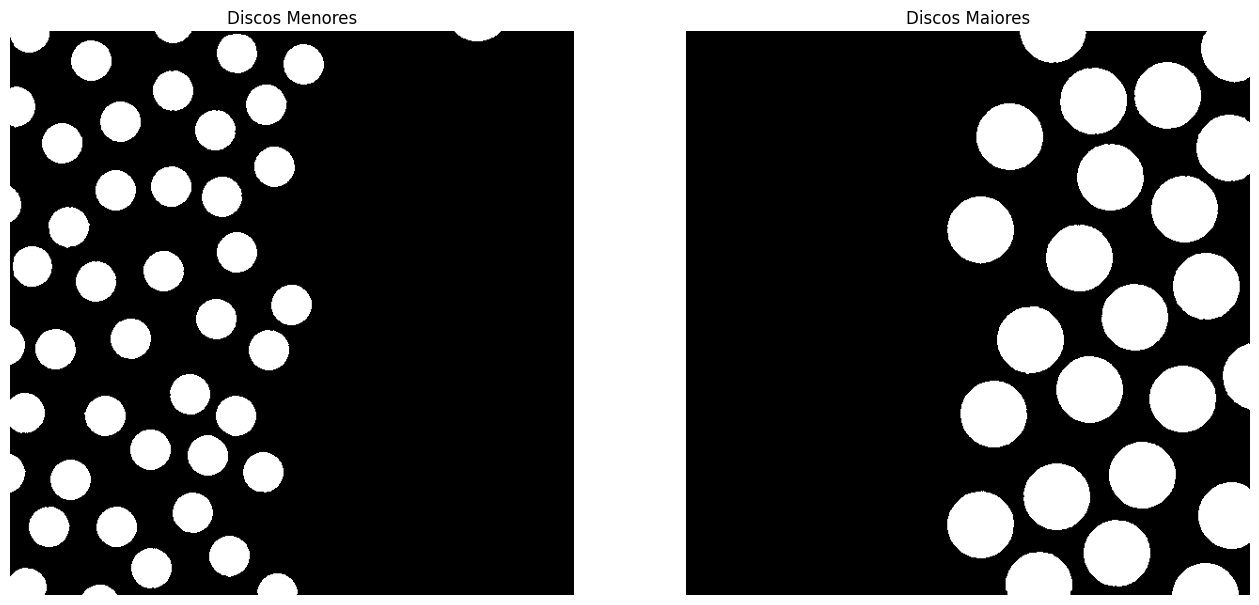

In [511]:
contornos, _ = cv2.findContours(median_blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_area = 100 
max_area = 1400 

small_discs = np.zeros_like(median_blur)
large_discs = np.zeros_like(median_blur)

for contour in contornos:
    area = cv2.contourArea(contour)
    if min_area < area < max_area:
        cv2.drawContours(small_discs, [contour], -1, 255, thickness=cv2.FILLED)
    elif area >= max_area:
        cv2.drawContours(large_discs, [contour], -1, 255, thickness=cv2.FILLED)

plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)
plt.imshow(small_discs, cmap='gray')
plt.title('Discos Menores')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(large_discs, cmap='gray')
plt.title('Discos Maiores')
plt.axis('off')

plt.show()


#### 7. Determinar os coeficientes de todas as retas presentes na imagem "rubik.png".

Número de linhas encontradas: 34
Linha 1: [[225.          2.2514746]]
Linha 2: [[227.          1.1519173]]
Linha 3: [[217.          2.2514746]]
Linha 4: [[810.           0.94247776]]
Linha 5: [[221.          2.2514746]]
Linha 6: [[808.          0.9599311]]
Linha 7: [[349.          1.1170107]]
Linha 8: [[916.          0.9250245]]
Linha 9: [[-152.           1.9547688]]
Linha 10: [[1.001000e+03 9.075712e-01]]
Linha 11: [[257.          2.3561945]]
Linha 12: [[215.          2.2863812]]
Linha 13: [[254.         2.338741]]
Linha 14: [[-81.         2.042035]]
Linha 15: [[669.          0.9773844]]
Linha 16: [[131.          2.2165682]]
Linha 17: [[824.          0.9599311]]
Linha 18: [[912.          0.9250245]]
Linha 19: [[804.          0.9599311]]
Linha 20: [[303.          2.3561945]]
Linha 21: [[141.          2.1991148]]
Linha 22: [[816.          0.9250245]]
Linha 23: [[231.         1.134464]]
Linha 24: [[813.           0.94247776]]
Linha 25: [[137.          2.1991148]]
Linha 26: [[815.        

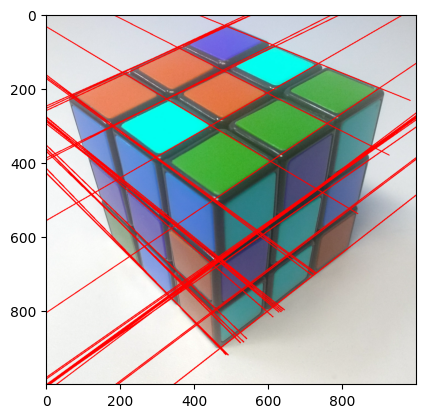

In [512]:
image = cv2.imread('img/rubik.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 70, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

num_lines = len(lines) if lines is not None else 0
print("Número de linhas encontradas:", num_lines)
for i, line in enumerate(lines):
    print(f"Linha {i + 1}: {line}")

plt.imshow(image)


#### 8. Aplique uma transformação de intensidade à imagem "lady.png" para aprimorar seu contraste.

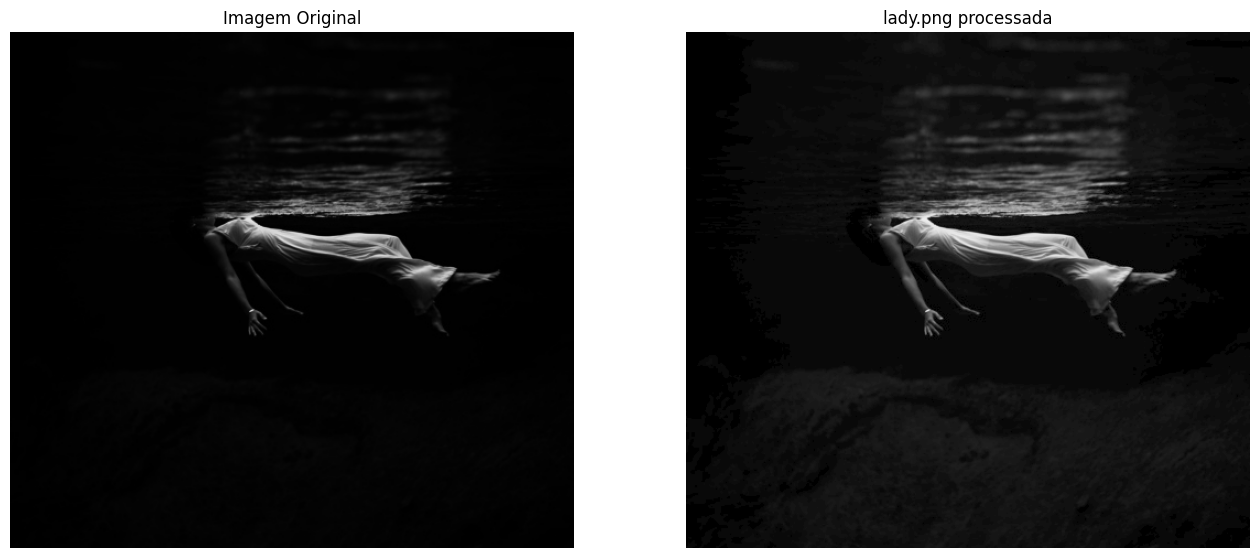

In [513]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("img/lady.png")
image_float = image.astype(np.float32) / 255.0

gamma = 0.6  
result_img = np.power(image_float, gamma)

result_img = (result_img * 255).astype(np.uint8)

plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title('lady.png processada')
plt.axis('off')

plt.show()


#### 9. A imagem "coded_message.png" contém uma mensagem cifrada numa das suas camadas binárias. Escreva o algoritmo que decifra esse código.

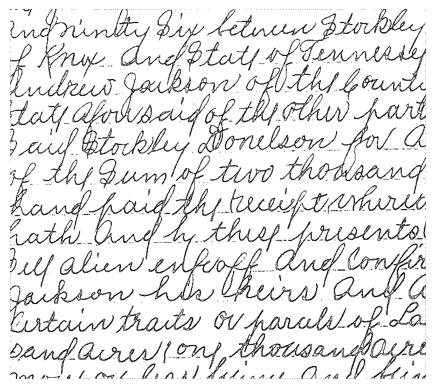

In [514]:
img = cv2.imread('img/coded_message.png')

r = img[:, :, 2]
result = np.zeros_like(r)

for i in range(r.shape[0]):
    for j in range(r.shape[1]):
        lsb = r[i, j] & 1
        if lsb >= 1:
            result[i, j] = 255  
        else:
            result[i, j] = 0  

plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()


#### 10. Filtre a imagem "lena_noise.png" para atenuar todos os ruídos periódicos presentes na imagem. Salve o resultado.